# Clustering Analysis

### Paris Ramrakha, 24942777 
### May 2023

### Overview
1. Import necessary packages 
2. Upload, merge, check, clean, and export the dataset
3. Explore dataset; Remove unnecessary features
4. Feature Engineering: encode categorical and object data for analysis 
5. Exploratory Analysis: data aggregation and visualisation 
6. Numeric Encoding
7. Scale the Data
8. Perform Dimensionality Reduction with Principal Component Analysis (PCA)
9. Train the K-Means Model
10.-11. Mean Shift and Hierarchical Clustering Analysis

### Warning! Sections 1-4 can take over 45mins to run. There is an optional start-point from Section 5, where the preceding sections have been saved into a new csv called 'dfanalyse_a3.csv'. 

### 1. Import necessary packages

In [1]:
conda install -c conda-forge altair vega_datasets

Note: you may need to restart the kernel to use updated packages.




==> WARNING: A newer version of conda exists. <==
  current version: 23.3.1
  latest version: 23.5.0

Please update conda by running

    $ conda update -n base -c defaults conda

Or to minimize the number of packages updated during conda update use

     conda install conda=23.5.0





Solving environment: ...working... done

# All requested packages already installed.



In [2]:
pip install geopy

In [3]:
import os
import io
import altair as alt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.cluster import MeanShift
from sklearn.cluster import AgglomerativeClustering
from datetime import datetime
from geopy import distance

### 2. Upload, merge, check, and export the dataset

Load the customer dataset, then print head and shape for inspection

In [4]:
customer_df = pd.read_csv('final/customers.csv', sep='|')

In [5]:
customer_df.head()

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,acct_num
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787
1,715-55-5575,4351161559407816183,Elaine,Fuller,F,310 Kendra Common Apt. 164,Leland,NC,28451,34.2680,-78.0578,27112,Professor Emeritus,1963-06-07,917558277935
2,167-48-5821,4192832764832,Michael,Cameron,M,05641 Robin Port,Cordova,SC,29039,33.4275,-80.8857,4215,International aid/development worker,1973-05-30,718172762479
3,406-83-7518,4238849696532874,Brandon,Williams,M,26916 Carlson Mountain,Birmingham,AL,35242,33.3813,-86.7046,493806,Seismic interpreter,1942-12-26,947268892251
4,697-93-1877,4514627048281480,Lisa,Hernandez,F,809 Burns Creek,Fargo,GA,31631,30.7166,-82.5801,559,Medical laboratory scientific officer,1939-05-22,888335239225


In [6]:
customer_df.shape

(1000, 15)

Load and concatenate the transaction files, then print head and shape for inspection

In [7]:
import os

directory = './final'
dfs = []

for filename in os.listdir(directory):
    if filename.startswith('transactions'):
        print(f'Reading {filename}...')
        filepath = os.path.join(directory, filename)
        df = pd.read_csv(filepath, sep='|')
        dfs.append(df)
    else:
        print(f'{filename} is not a transaction file. Skipping...')

if len(dfs) > 0:
    transaction_df = pd.concat(dfs, ignore_index=True)
    print(f'Successfully merged {len(dfs)} dataframes into one.')
else:
    print('No CSV files found in directory.')

customers.csv is not a transaction file. Skipping...
Reading transactions_0.csv...
Reading transactions_1.csv...
Reading transactions_10.csv...
Reading transactions_100.csv...
Reading transactions_101.csv...
Reading transactions_102.csv...
Reading transactions_103.csv...
Reading transactions_104.csv...
Reading transactions_105.csv...
Reading transactions_106.csv...
Reading transactions_107.csv...
Reading transactions_108.csv...
Reading transactions_109.csv...
Reading transactions_11.csv...
Reading transactions_110.csv...
Reading transactions_111.csv...
Reading transactions_112.csv...
Reading transactions_113.csv...
Reading transactions_114.csv...
Reading transactions_115.csv...
Reading transactions_116.csv...
Reading transactions_117.csv...
Reading transactions_118.csv...
Reading transactions_119.csv...
Reading transactions_12.csv...
Reading transactions_120.csv...
Reading transactions_121.csv...
Reading transactions_122.csv...
Reading transactions_123.csv...
Reading transactions_124.c

In [8]:
transaction_df.head()

,cc_num,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,4218196001337,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,4218196001337,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,4218196001337,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,4218196001337,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,4218196001337,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434


In [9]:
transaction_df.shape

(4260904, 10)

Merge into one dataframe called 'df'

In [10]:
df = customer_df.merge(transaction_df, on=['cc_num', 'acct_num'])
df

,ssn,cc_num,first,last,gender,street,city,state,zip,lat,...,dob,acct_num,trans_num,unix_time,category,amt,is_fraud,merchant,merch_lat,merch_long
0,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,91ab12e73ef38206e1121e9648d2408d,1558719550,gas_transport,69.12,0,Phillips Group,39.491416,-75.588522
1,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,071553d533a6822a4431c354c434ddcb,1569425519,grocery_pos,68.11,0,Tucker Ltd,40.890319,-75.573359
2,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,0cfad38ef15e4749eff68dc83f62c151,1577205601,misc_net,40.35,0,Dixon PLC,39.244958,-74.475327
3,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,5782693d7c70f062f258cb30bfa8900f,1571428238,grocery_pos,96.22,0,Lambert-Cooper,39.656925,-75.802342
4,115-04-4507,4218196001337,Jonathan,Johnson,M,863 Lawrence Valleys,Ambler,PA,19002,40.1809,...,1959-10-03,888022315787,35fd7db657d7e30dd608c37f7798186e,1549840400,gas_transport,71.89,0,Griffith LLC,40.313342,-74.220434
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4260899,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,4eafc5b16da625c3436f2484d8dcabcb,1627636943,health_fitness,7.47,0,"Horton, Ware and Reynolds",27.707908,-82.320308
4260900,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,041b18f68b893b68e7aa29c16a08a08d,1624880326,food_dining,2.30,0,Hanson and Sons,27.896372,-83.387356
4260901,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,a26df5348dfee4839f0fa00155e2ed1c,1629797869,health_fitness,5.82,0,White LLC,27.110602,-82.426821
4260902,107-40-0160,343251790447085,Isaac,Smith,M,67148 Rose Cliff Apt. 314,Saint Petersburg,FL,33710,27.7898,...,1942-07-21,298026601683,e388fc8055b1426c62640baaae10108f,1629976595,health_fitness,9.16,0,Snyder-Johnson,28.110510,-81.891797


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4260904 entries, 0 to 4260903
Data columns (total 23 columns):
 #   Column      Dtype  
---  ------      -----  
 0   ssn         object 
 1   cc_num      object 
 2   first       object 
 3   last        object 
 4   gender      object 
 5   street      object 
 6   city        object 
 7   state       object 
 8   zip         int64  
 9   lat         float64
 10  long        float64
 11  city_pop    int64  
 12  job         object 
 13  dob         object 
 14  acct_num    object 
 15  trans_num   object 
 16  unix_time   object 
 17  category    object 
 18  amt         float64
 19  is_fraud    object 
 20  merchant    object 
 21  merch_lat   float64
 22  merch_long  float64
dtypes: float64(5), int64(2), object(16)
memory usage: 780.2+ MB


Check for null and NaN values; look for duplicates 

In [12]:
df.isna().sum()

ssn           0
cc_num        0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
acct_num      0
trans_num     0
unix_time     0
category      0
amt           0
is_fraud      0
merchant      0
merch_lat     0
merch_long    0
dtype: int64

In [13]:
df.duplicated().sum()

0

export the merged dataframe so it can be loaded quickly for future analyses

In [14]:
df.to_csv('merged_customer_transaction.csv')


#### Summary: There was customer data for 1000 customers, and transaction data for approx. 4.2 million transactions. We need to be mindful that this data is sensitive and personal information. It includes addresses, names, occupations, credit card numbers, account numbers, and misuse or inappropriate distribution of this information would represent a severe breach of both ethics and legislation. 

### 3. Explore dataset

In [15]:
#There are 726 different cities 

df['city'].nunique()

726

In [16]:
#In 51 different states

df['state'].nunique()

51

In [17]:
#There are 939 different zip codes 

df['zip'].nunique()

939

In [18]:
#There are >500 different occupations represented

print("Total unique jobs in the feature job:\n", df["job"].value_counts(), "\n")

Total unique jobs in the feature job:
 Computer games developer      33859
Radio producer                28746
Patent attorney               27990
Teacher, adult education      27692
General practice doctor       27279
                              ...  
Waste management officer        358
Nurse, learning disability      358
Geneticist, molecular            12
Sales executive                   7
Loss adjuster, chartered          7
Name: job, Length: 505, dtype: int64 



Note that account number and credit card number have the same number of discrete values, that is, they are essentially duplicate versions of each other. 

In [19]:
df['acct_num'].nunique()

983

In [20]:
df['cc_num'].nunique()

983

In fact, we should remove the fraudulent transactions from our dataframe, as these transactions will not assist us in identifying customer groups for marketing purposes. 

Furthermore, first and last names are not relevant for analysis, and are personal and identifying information, potentially leading to breach of privacy. We should drop the first and last names from the dataframe. 

In [21]:
df['is_fraud'].value_counts(normalize=True)

0    0.998819
1    0.001181
Name: is_fraud, dtype: float64

In [22]:
df = df[df['is_fraud'] == 0]

In [23]:
df=df.drop(['first','last', 'street', 'city', 'state'],axis=1)

#### Summary: We removed fraudulent transactions from the dataframe, because they are not useful for our business case. We looked at the number of unique values for some of our categorical data, to see if and how these features could be used in our analysis. Likewise, street, city, and state are not useful for analysis. Additionally, we noticed that the features 'acct_num' and 'cc_num' are equivalent, therefore one of these features can be removed from the dataframe. 

### 4. Feature Engineering: 

#### encode 'gender', 'age', 'ageband' as numeric
#### Calculate 'distance', being the distance in km between the customer lat-long and the merchant lat-long

Make a copy of the dataframe, as a back-up

In [24]:
dff=df.copy()

Apply Label Encoder to binary 'gender' feature. (One Hot Encoding is another option here and is more or less equivalent.)

We would advocate that the bank offer customers a non-binary gender options. While gender is a tick-box exercise for big corporations, for people who don't fit the binary category, that can be distressing. 

In [25]:
dff['gender'].value_counts()

F    2173250
M    2082620
Name: gender, dtype: int64

In [26]:
le = LabelEncoder()
dff['gender'] = le.fit_transform(dff['gender'])
dff['gender'].head(n=20)

0     1
1     1
2     1
3     1
4     1
5     1
6     1
7     1
8     1
9     1
10    1
11    1
12    1
13    1
14    1
15    1
16    1
17    1
18    1
19    1
Name: gender, dtype: int32

Derive 'age' from 'dob'

In [27]:
now = pd.Timestamp('now')
dff['dob'] = pd.to_datetime(dff['dob'])   
dff['dob'] = dff['dob'].where(dff['dob'] < now, dff['dob'] -  np.timedelta64(100, 'Y'))   
dff['age'] = (now - dff['dob']).astype('<m8[Y]')   

In [28]:
age_counts = dff['age'].value_counts()
age_unique = np.array(age_counts.index)
print(np.sort(age_unique))

[15. 16. 17. 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32.
 33. 34. 35. 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50.
 51. 52. 53. 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68.
 69. 70. 71. 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86.
 87. 88. 89. 90. 91. 92. 93. 94. 95.]


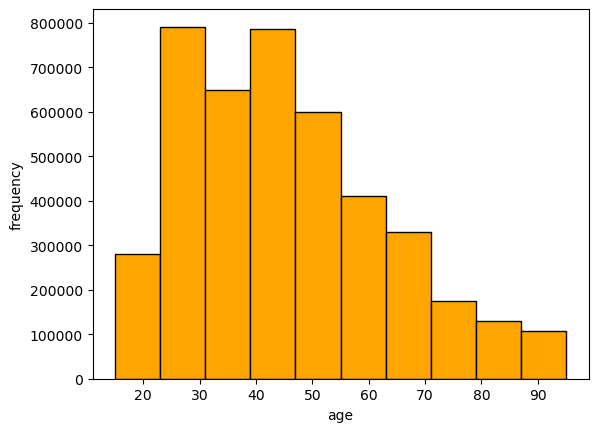

In [29]:
plt.hist(dff['age'], color='orange', edgecolor='black')
plt.xlabel('age')
plt.ylabel('frequency')
plt.show()

Age can further be organised into age brackets: 

In [30]:
bins = [-1,17,25,35,45,55,65,75,85,100]
dff['ageband'] = pd.cut(dff['age'], bins) 

In [31]:
print("n ageband:\n", dff["ageband"].value_counts(), "\n")

n ageband:
 (25, 35]     968753
(35, 45]     890006
(45, 55]     748139
(17, 25]     544384
(55, 65]     525034
(65, 75]     293497
(75, 85]     152690
(85, 100]    122191
(-1, 17]      11176
Name: ageband, dtype: int64 



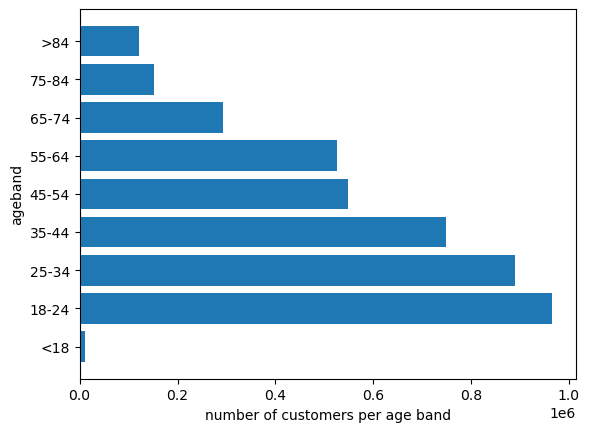

In [32]:
y=[11176, 965475, 890006, 748139, 547662, 525034, 293497, 152690, 122191]
x=['<18', '18-24', '25-34', '35-44', '45-54', '55-64', '65-74', '75-84', '>84']
plt.barh(x,y)
plt.xlabel('number of customers per age band')
plt.ylabel('ageband')
plt.show()

It will be interesting to know whether purchases are being made locally or long distance (ie. most likely online, or else on holiday). We can calculate the distance between the customer and the merchant using the latitude-longitude data provided. 

### ****NB: This cell can take up to 30 minutes to run****

In [33]:
dff["distance"] = dff.apply(lambda x: distance.distance((x["lat"], x["long"]), (x["merch_lat"], x["merch_long"])).km, axis = 1)
dff['distance'].head()

0     82.942792
1     84.407101
2    121.770076
3     76.818262
4     85.941045
Name: distance, dtype: float64

In [34]:
dff['distance'].describe()

count    4.255870e+06
mean     7.653999e+01
std      2.920159e+01
min      6.766473e-02
25%      5.567865e+01
50%      7.878398e+01
75%      9.894630e+01
max      1.518573e+02
Name: distance, dtype: float64

In [35]:
dff['distance'].median()

78.78397855051824

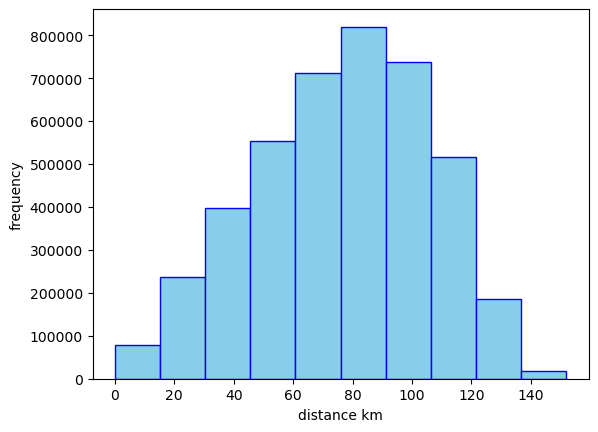

In [36]:
plt.hist(dff['distance'], color='skyblue', edgecolor='blue')
plt.xlabel('distance km')
plt.ylabel('frequency')
plt.show()

Note that only around 25% of purchases were made < 50km from the customer's home. 
This could represent a marketing angle for the business, because customers making online purchases or while they are on holidays will be looking for security and safety of their transactions

Next, we can determine the timing of transactions from the 'unix_time' feature. We can look at year and month, which will let us look at monthly and yearly spending patterns. We can also look at the day of the week, and hour of the day, that purchases are made. This may (or may not) give insight into purchasing behaviour. 

In [38]:
dff['date_time'] = pd.to_datetime(dff['unix_time'],unit='s')
dff['date_time'].head()

0   2019-05-24 17:39:10
1   2019-09-25 15:31:59
2   2019-12-24 16:40:01
3   2019-10-18 19:50:38
4   2019-02-10 23:13:20
Name: date_time, dtype: datetime64[ns]

In [39]:
dff['date_time'].info()

<class 'pandas.core.series.Series'>
Int64Index: 4255870 entries, 0 to 4260903
Series name: date_time
Non-Null Count    Dtype         
--------------    -----         
4255870 non-null  datetime64[ns]
dtypes: datetime64[ns](1)
memory usage: 64.9 MB


In [40]:
# Find out the range of dates of transactions, and look for gross outliers

date_range = str(dff['date_time'].dt.date.min()) + ' to ' +str(dff['date_time'].dt.date.max())
print(date_range)

2018-12-31 to 2022-12-31


In [41]:
dff['hours'] = dff['date_time'].dt.strftime('%H')
dff['hour'] = dff['hours'].astype(str).astype(int)
dff['weekday'] = dff['date_time'].dt.dayofweek
dff['months'] = dff['date_time'].dt.strftime('%m')
dff['month'] = dff['months'].astype(str).astype(int)
dff['year'] = dff['date_time'].dt.year

Create a month_year feature that can be used as an additional identifying feature when looking at monthly spending data 

In [42]:
dff['trans_dt'] = pd.to_datetime(dff['unix_time'], unit='s')

dff['month_year'] = pd.to_datetime(dff['trans_dt']).dt.to_period('M')

dff['month_year'].head()

0    2019-05
1    2019-09
2    2019-12
3    2019-10
4    2019-02
Name: month_year, dtype: period[M]

Drop dummy columns and display the dataframe to see all our new features

In [43]:
dff = dff.drop(columns=['hours', 'months', 'trans_dt'])
dff.head()

,ssn,cc_num,gender,zip,lat,long,city_pop,job,dob,acct_num,...,merch_long,age,ageband,distance,date_time,hour,weekday,month,year,month_year
0,115-04-4507,4218196001337,1,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787,...,-75.588522,63.0,"(55, 65]",82.942792,2019-05-24 17:39:10,17,4,5,2019,2019-05
1,115-04-4507,4218196001337,1,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787,...,-75.573359,63.0,"(55, 65]",84.407101,2019-09-25 15:31:59,15,2,9,2019,2019-09
2,115-04-4507,4218196001337,1,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787,...,-74.475327,63.0,"(55, 65]",121.770076,2019-12-24 16:40:01,16,1,12,2019,2019-12
3,115-04-4507,4218196001337,1,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787,...,-75.802342,63.0,"(55, 65]",76.818262,2019-10-18 19:50:38,19,4,10,2019,2019-10
4,115-04-4507,4218196001337,1,19002,40.1809,-75.2156,32412,Accounting technician,1959-10-03,888022315787,...,-74.220434,63.0,"(55, 65]",85.941045,2019-02-10 23:13:20,23,6,2,2019,2019-02


In [44]:
dff.shape

(4255870, 27)

Export dataframe to csv, as a shortcut for future work sessions

In [45]:
dff.to_csv('dfanalyse_a3.csv', encoding='utf-8', index=False)

#### Summary: Prior to exploratory analysis, we converted gender to numeric values, 'dob' to age and age bracket, long-lat data to distance (km), and determined the year, month, week day and hour of purchases. 

### 5. Exploratory Analysis: data aggregation and visualisation 

In [46]:
#Alternative starting point to save time 
#dff = pd.read_csv('dfanalyse_a3.csv')

In [47]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4255870 entries, 0 to 4260903
Data columns (total 27 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ssn         object        
 1   cc_num      object        
 2   gender      int32         
 3   zip         int64         
 4   lat         float64       
 5   long        float64       
 6   city_pop    int64         
 7   job         object        
 8   dob         datetime64[ns]
 9   acct_num    object        
 10  trans_num   object        
 11  unix_time   object        
 12  category    object        
 13  amt         float64       
 14  is_fraud    object        
 15  merchant    object        
 16  merch_lat   float64       
 17  merch_long  float64       
 18  age         float64       
 19  ageband     category      
 20  distance    float64       
 21  date_time   datetime64[ns]
 22  hour        int32         
 23  weekday     int64         
 24  month       int32         
 25  year        int64 

Here, we are looking at monthly spending, and features that may influence it. 
To determine monthly spending, we have grouped the period variable 'month_year' (eg. 12_2022) with account number, to determine monthly spending per customer account. 

In [65]:
# With thanks to Chuan for demonstrating how to aggregate data in this manner

month_spend = dff.groupby(['acct_num', 'month_year']).agg({
    'category': lambda x: x.value_counts().idxmax(),
    'age': 'min',
    'ageband': 'min',
    'gender': 'first',
    'job': 'first',
    'city_pop': 'first',
    'zip': 'first',
    'distance': 'first',
    'hour': 'first', 
    'weekday': 'first',
    'amt': ['mean', 'max', 'min', 'sum']
}).reset_index()

In [66]:
month_spend.columns = ['acct_num', 'month_year', 'category', 'age', 'ageband', 'gender', 'job', 'city_pop', 'zip', 'distance', 'hour', 'weekday', 'mean_amt', 'max_amt', 'min_amt', 'total_amt']


In [51]:
month_spend.head(20)

,acct_num,month_year,category,age,gender,job,city_pop,zip,distance,hour,weekday,mean_amt,max_amt,min_amt,total_amt
0,2348758451,2018-12,gas_transport,46.0,1,"Surveyor, minerals",478127,14621,100.226503,21,0,96.050000,96.05,96.05,96.05
1,2348758451,2019-01,gas_transport,46.0,1,"Surveyor, minerals",478127,14621,58.120476,0,4,78.377750,359.87,5.67,3135.11
2,2348758451,2019-02,gas_transport,46.0,1,"Surveyor, minerals",478127,14621,69.648512,13,0,62.837143,245.29,4.41,3079.02
3,2348758451,2019-03,gas_transport,46.0,1,"Surveyor, minerals",478127,14621,100.841254,22,5,54.632456,131.91,1.73,3114.05
4,2348758451,2019-04,gas_transport,46.0,1,"Surveyor, minerals",478127,14621,101.755199,17,5,69.893500,1183.46,1.27,4193.61
5,2348758451,2019-05,gas_transport,46.0,1,"Surveyor, minerals",478127,14621,64.962224,18,2,57.209733,115.28,1.10,4290.73
6,2348758451,2019-06,gas_transport,46.0,1,"Surveyor, minerals",478127,14621,79.876099,19,2,54.582388,133.62,1.07,3657.02
7,2348758451,2019-07,grocery_net,46.0,1,"Surveyor, minerals",478127,14621,74.956670,23,3,53.793000,98.39,1.82,3765.51
8,2348758451,2019-08,grocery_net,46.0,1,"Surveyor, minerals",478127,14621,94.909295,1,6,58.886176,123.09,1.48,4004.26
9,2348758451,2019-09,grocery_pos,46.0,1,"Surveyor, minerals",478127,14621,81.990091,17,5,47.384118,137.61,1.18,2416.59


In [52]:
month_spend.shape

(43759, 15)

In [53]:
month_spend.dtypes

acct_num          int64
month_year    period[M]
category         object
age             float64
gender            int32
job              object
city_pop          int64
zip               int64
distance        float64
hour              int32
weekday           int64
mean_amt        float64
max_amt         float64
min_amt         float64
total_amt       float64
dtype: object

Now we will do a similar thing and also look at yearly spending patterns, with the same features. 

To determine yearly spending, we have grouped the 'year' (2022) with account number, to determine yearly spending per customer account. 

In [54]:
#yearly spending

yearspend = dff.groupby(['acct_num', 'year']).agg({
    'category': lambda x: x.value_counts().idxmax(),
    'age': 'first',
    'ageband': 'first',
    'gender': 'first',
    'job': 'first',
    'city_pop': 'first',
    'zip': 'first',
    'distance': 'first',
    'hour': 'first',
    'weekday': 'first',
    
    'amt': ['mean', 'max', 'min', 'sum']
}).reset_index()
        
yearspend.columns = ['acct_num', 'mth_year', 'category', 'age', 'ageband', 'gender', 'job', 'city_pop', 'zip', 'distance', 'hour', 'weekday', 'mean_amt', 'max_amt', 'min_amt', 'total_amt']


In [55]:
yearspend.shape

(4159, 16)

In [56]:
yearspend.dtypes

acct_num        int64
mth_year        int64
category       object
age           float64
ageband      category
gender          int32
job            object
city_pop        int64
zip             int64
distance      float64
hour            int32
weekday         int64
mean_amt      float64
max_amt       float64
min_amt       float64
total_amt     float64
dtype: object

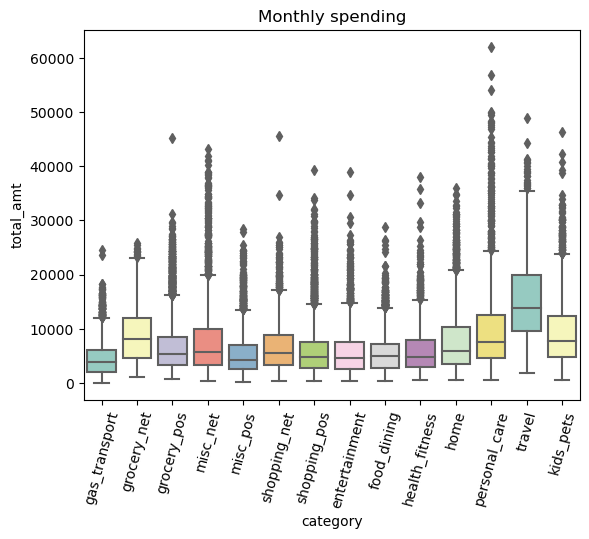

In [57]:
sns.boxplot(x='category', y='total_amt', data=month_spend, palette='Set3')
plt.title('Monthly spending')
plt.xticks(rotation=75)
plt.show()

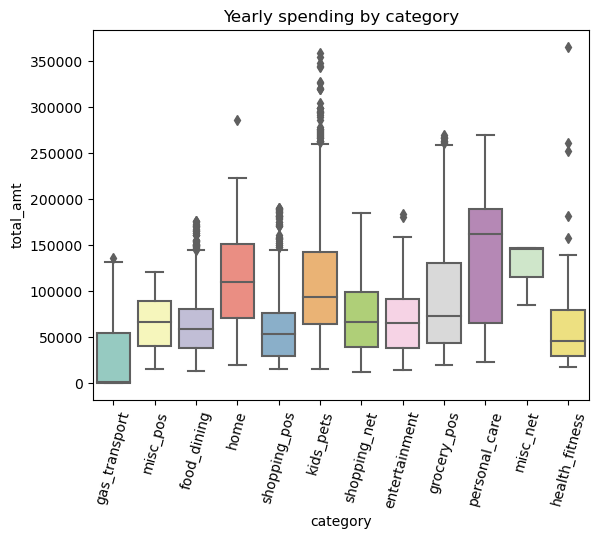

In [58]:
sns.boxplot(x='category', y='total_amt', data=yearspend, palette='Set3')
plt.title('Yearly spending by category')
plt.xticks(rotation=75)
plt.show()

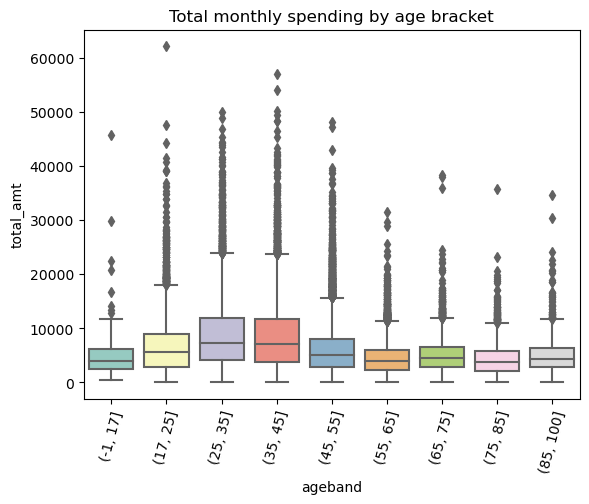

In [67]:
sns.boxplot(x='ageband', y='total_amt', data=month_spend, palette='Set3')
plt.title('Total monthly spending by age bracket')
plt.xticks(rotation=75)
plt.show()

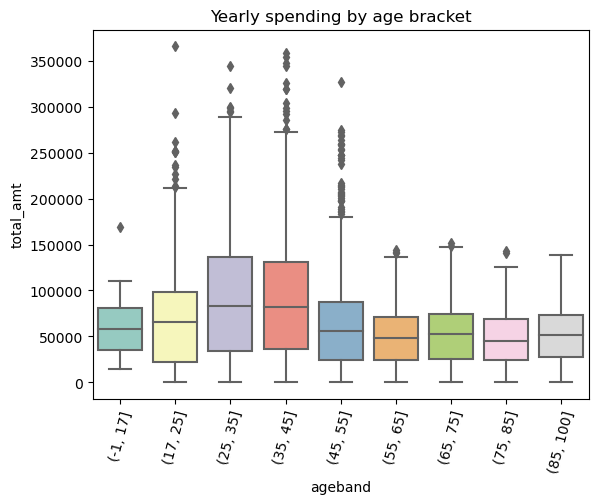

In [63]:
sns.boxplot(x='ageband', y='total_amt', data=yearspend, palette='Set3')
plt.title('Yearly spending by age bracket')
plt.xticks(rotation=75)
plt.show()

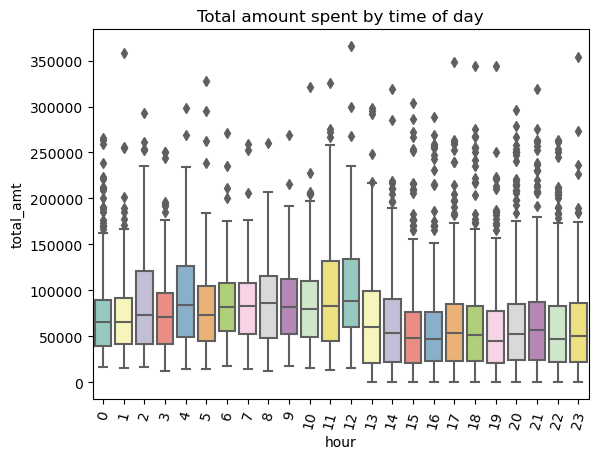

In [68]:
sns.boxplot(x='hour', y='total_amt', data=yearspend, palette='Set3')
plt.title('Total amount spent by time of day')
plt.xticks(rotation=75)
plt.show()

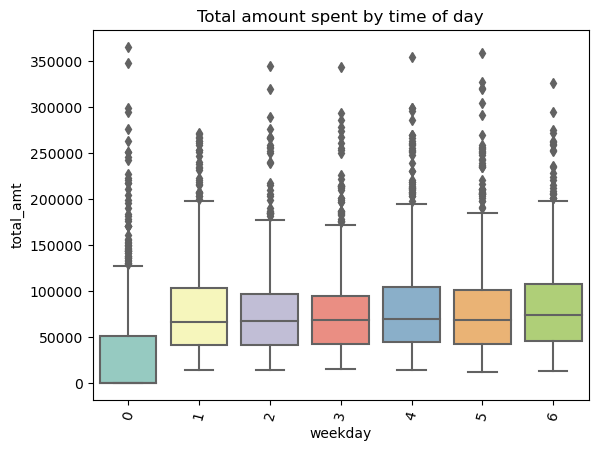

In [69]:
sns.boxplot(x='weekday', y='total_amt', data=yearspend, palette='Set3')
plt.title('Total amount spent by time of day')
plt.xticks(rotation=75)
plt.show()

## 6. Numeric Encoding

Convert remaining non-numeric data that will be used for our clustering model.

'Category' to numeric

In [70]:
#There are 14 unique purchase types in 'category'

dff['category'].nunique()

14

In [71]:
#dfanalyse['category'].hist(grid=False, xrot=90)

In [72]:
dff.category.value_counts().to_dict()

{'shopping_pos': 419631,
 'home': 403122,
 'grocery_pos': 399819,
 'kids_pets': 371934,
 'gas_transport': 364829,
 'food_dining': 320880,
 'entertainment': 312328,
 'shopping_net': 305855,
 'personal_care': 300594,
 'misc_pos': 281820,
 'health_fitness': 265907,
 'misc_net': 190648,
 'grocery_net': 181532,
 'travel': 136971}

In [73]:
dff_category_frmap = dff.category.value_counts().to_dict()

In [74]:
dff.category = dff.category.map(dff_category_frmap)

'Job' to numeric

In [75]:
#interested to know what occupations customers have, whether this can be simplified or binned in any way 

job_counts = dff["job"].value_counts()
job_unique = np.array(job_counts.index)
job_unique

array(['Computer games developer', 'Radio producer', 'Patent attorney',
       'Teacher, adult education', 'General practice doctor',
       'Accountant, chartered public finance', 'Quarry manager',
       'Chief Financial Officer', 'Sports therapist',
       'Surveyor, hydrographic', 'Call centre manager',
       'Chief Executive Officer', 'Designer, exhibition/display',
       'Sales promotion account executive', 'Data scientist',
       'Camera operator', 'Manufacturing systems engineer',
       'Counselling psychologist', 'Nurse, mental health',
       'Software engineer', 'Immigration officer',
       'Teacher, English as a foreign language', 'Metallurgist',
       'Investment banker, operational', 'Artist',
       'Environmental manager', 'Social research officer, government',
       'Associate Professor', 'Arts development officer',
       'Games developer', 'Designer, interior/spatial',
       'Chartered accountant', 'Engineer, aeronautical',
       'Publishing rights manager',

In [76]:
dff.job.value_counts().to_dict()

{'Computer games developer': 33806,
 'Radio producer': 28725,
 'Patent attorney': 27963,
 'Teacher, adult education': 27684,
 'General practice doctor': 27253,
 'Accountant, chartered public finance': 26920,
 'Quarry manager': 26606,
 'Chief Financial Officer': 25463,
 'Sports therapist': 24011,
 'Surveyor, hydrographic': 23641,
 'Call centre manager': 23638,
 'Chief Executive Officer': 23606,
 'Designer, exhibition/display': 23200,
 'Sales promotion account executive': 22876,
 'Data scientist': 22560,
 'Camera operator': 21835,
 'Manufacturing systems engineer': 21808,
 'Counselling psychologist': 21803,
 'Nurse, mental health': 21088,
 'Software engineer': 20294,
 'Immigration officer': 19979,
 'Teacher, English as a foreign language': 19957,
 'Metallurgist': 19634,
 'Investment banker, operational': 19627,
 'Artist': 19245,
 'Environmental manager': 19232,
 'Social research officer, government': 18950,
 'Associate Professor': 18914,
 'Arts development officer': 18557,
 'Games develo

In [77]:
dff_jobfrmap = dff.job.value_counts().to_dict()

In [79]:
dff.job = dff.job.map(dff_jobfrmap)

Convert 'mth_year' to numeric

In [81]:
le = LabelEncoder()
dff['month_year'] = le.fit_transform(dff['month_year'])
dff['month_year'].head(n=20)

0      5
1      9
2     12
3     10
4      2
5     14
6     16
7      8
8     25
9     30
10     2
11    23
12    13
13    27
14    21
15    24
16     9
17    29
18     6
19    13
Name: month_year, dtype: int32

Convert 'ageband' to numeric

In [83]:
label_encoder = LabelEncoder()
dff['ageband']=label_encoder.fit_transform(dff['ageband'])

In [84]:
dff['mth_year']=label_encoder.fit_transform(dff['ageband'])

In [85]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4255870 entries, 0 to 4260903
Data columns (total 28 columns):
 #   Column      Dtype         
---  ------      -----         
 0   ssn         object        
 1   cc_num      object        
 2   gender      int32         
 3   zip         int64         
 4   lat         float64       
 5   long        float64       
 6   city_pop    int64         
 7   job         int64         
 8   dob         datetime64[ns]
 9   acct_num    object        
 10  trans_num   object        
 11  unix_time   object        
 12  category    int64         
 13  amt         float64       
 14  is_fraud    object        
 15  merchant    object        
 16  merch_lat   float64       
 17  merch_long  float64       
 18  age         float64       
 19  ageband     int32         
 20  distance    float64       
 21  date_time   datetime64[ns]
 22  hour        int32         
 23  weekday     int64         
 24  month       int32         
 25  year        int64 

Summary: We used frequency encoding for Category and Job. This was thought to be preferable to one hot encoding, which would introduce a large number of (mostly empty) feature columns to our dataframe (eg. for Job, around 500 extra columns would be generated). 
For the objects 'month_year', and 'ageband' we applied a label encoder. 

## 7. Scale the Data

Scaling allows comparison between variables of different magnitudes (for example, comparing 'distance' which is measured in kilometres, with 'age'). 

In [86]:
X = dff[['gender','zip','city_pop','job', 'category', 'amt', 'month_year', 'distance', 'ageband', 'hour', 'weekday']]

In [87]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

## 8. Perform Dimensionality Reduction with Principal Component Analysis (PCA)

Having too many dimensions actually confounds our results. PCA is used to determine the features that account for the majority of variance. This also helps to prevent overfitting. 

In [88]:
pca = PCA()
pca.fit(X_scaled)

PCA()

In [89]:
#make a list to contain the principal components
pc_list = [f'PC{i}' for i in list(range(1, pca.n_features_in_ + 1))]
pc_list

['PC1', 'PC2', 'PC3', 'PC4', 'PC5', 'PC6', 'PC7', 'PC8', 'PC9', 'PC10', 'PC11']

In [90]:
#make a dictionary of the principal components and the variance explained
pc_data = {
    'pc': pc_list,
    'exp_variance': list(pca.explained_variance_ratio_)
}
pc_data

{'pc': ['PC1',
  'PC2',
  'PC3',
  'PC4',
  'PC5',
  'PC6',
  'PC7',
  'PC8',
  'PC9',
  'PC10',
  'PC11'],
 'exp_variance': [0.13590109062904937,
  0.10976717597793897,
  0.09687554928959939,
  0.09339403958551443,
  0.09133948008149811,
  0.09038191462018,
  0.08924364693557249,
  0.08618628846744325,
  0.08507841164767596,
  0.07261302461674242,
  0.04921937814878566]}

In [91]:
#save it as a dataframe
pc_df = pd.DataFrame(pc_data)
pc_df

,pc,exp_variance
0,PC1,0.135901
1,PC2,0.109767
2,PC3,0.096876
3,PC4,0.093394
4,PC5,0.091339
5,PC6,0.090382
6,PC7,0.089244
7,PC8,0.086186
8,PC9,0.085078
9,PC10,0.072613


Therefore, approx 50% of variance is explained by 5 principal components, and 8 principal components can explain approximately 80% of variance. 

#### This line chart to demonstrates the variance ratio for the principal components we just calculated

In [92]:
alt.Chart(pc_df).mark_line().transform_window(
    cum_var='sum(exp_variance)'
).encode(
    x=alt.X('pc:N', sort=list(X.columns)),
    y='cum_var:Q'
).properties(width=600)

alt.Chart(...)

In [93]:
#save our calculations into a dictionary
pc_loadings = dict(zip(pc_list, pca.components_))
pc_loadings

{'PC1': array([-0.06064116, -0.05018086, -0.05638899, -0.12474851,  0.04076068,
         0.07843979, -0.60934577, -0.00461821,  0.32016542,  0.67739163,
        -0.18590179]),
 'PC2': array([ 0.24673752,  0.12685167,  0.41156532,  0.563861  , -0.16059696,
         0.01789272, -0.32655946,  0.03342518, -0.53353461,  0.12747129,
        -0.03043095]),
 'PC3': array([-0.54134544, -0.45129304, -0.24926782,  0.35476519, -0.17191403,
         0.46910136, -0.03558301, -0.16111566, -0.10943063, -0.01829881,
         0.16168513]),
 'PC4': array([-0.3260954 ,  0.64121014,  0.20845967, -0.18481871, -0.13758611,
         0.50764837,  0.02634328,  0.3232739 ,  0.02289828,  0.00734793,
         0.14994282]),
 'PC5': array([-0.18356808, -0.08935294,  0.27947046,  0.23088509,  0.86904071,
         0.03647081, -0.03706416,  0.19380014,  0.10608914, -0.06072589,
         0.12833741]),
 'PC6': array([-0.03263726,  0.27840446,  0.19484749, -0.08211247,  0.16601948,
         0.12043116, -0.0077781 , -0.910

In [94]:
#and now save into a dataframe
loadings_df = pd.DataFrame(pc_loadings)
loadings_df

,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,-0.060641,0.246738,-0.541345,-0.326095,-0.183568,-0.032637,0.002477,0.565833,0.345846,0.247536,0.015198
1,-0.050181,0.126852,-0.451293,0.641210,-0.089353,0.278404,-0.024130,0.016876,-0.449812,0.278374,0.019790
2,-0.056389,0.411565,-0.249268,0.208460,0.279470,0.194847,0.067212,-0.465992,0.582764,-0.210703,-0.009967
3,-0.124749,0.563861,0.354765,-0.184819,0.230885,-0.082112,0.058971,-0.133598,-0.161325,0.631468,-0.018103
4,0.040761,-0.160597,-0.171914,-0.137586,0.869041,0.166019,0.082226,0.282956,-0.196122,-0.088888,-0.089882
5,0.078440,0.017893,0.469101,0.507648,0.036471,0.120431,0.320906,0.518023,0.354060,0.056954,-0.000170
6,-0.609346,-0.326559,-0.035583,0.026343,-0.037064,-0.007778,0.168186,-0.097595,0.127010,0.188775,-0.655045
7,-0.004618,0.033425,-0.161116,0.323274,0.193800,-0.910498,-0.015809,0.026883,0.017763,-0.023240,-0.002087
8,0.320165,-0.533535,-0.109431,0.022898,0.106089,0.011373,0.012110,-0.253546,0.316397,0.603617,0.245068
9,0.677392,0.127471,-0.018299,0.007348,-0.060726,-0.003466,-0.132597,-0.016178,0.001199,0.043153,-0.707881


In [95]:
#apply labels
loadings_df.insert(0,'feature_names', X.columns)
loadings_df

,feature_names,PC1,PC2,PC3,PC4,PC5,PC6,PC7,PC8,PC9,PC10,PC11
0,gender,-0.060641,0.246738,-0.541345,-0.326095,-0.183568,-0.032637,0.002477,0.565833,0.345846,0.247536,0.015198
1,zip,-0.050181,0.126852,-0.451293,0.641210,-0.089353,0.278404,-0.024130,0.016876,-0.449812,0.278374,0.019790
2,city_pop,-0.056389,0.411565,-0.249268,0.208460,0.279470,0.194847,0.067212,-0.465992,0.582764,-0.210703,-0.009967
3,job,-0.124749,0.563861,0.354765,-0.184819,0.230885,-0.082112,0.058971,-0.133598,-0.161325,0.631468,-0.018103
4,category,0.040761,-0.160597,-0.171914,-0.137586,0.869041,0.166019,0.082226,0.282956,-0.196122,-0.088888,-0.089882
5,amt,0.078440,0.017893,0.469101,0.507648,0.036471,0.120431,0.320906,0.518023,0.354060,0.056954,-0.000170
6,month_year,-0.609346,-0.326559,-0.035583,0.026343,-0.037064,-0.007778,0.168186,-0.097595,0.127010,0.188775,-0.655045
7,distance,-0.004618,0.033425,-0.161116,0.323274,0.193800,-0.910498,-0.015809,0.026883,0.017763,-0.023240,-0.002087
8,ageband,0.320165,-0.533535,-0.109431,0.022898,0.106089,0.011373,0.012110,-0.253546,0.316397,0.603617,0.245068
9,hour,0.677392,0.127471,-0.018299,0.007348,-0.060726,-0.003466,-0.132597,-0.016178,0.001199,0.043153,-0.707881


#### Below is a series of horizontal bar charts that demonstrate the loadings of our principal component analysis against the original features. 

In [96]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC1:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [97]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC2:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [98]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC3:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [99]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC4:Q',
    y="feature_names:N"
)

alt.Chart(...)

In [100]:
alt.Chart(loadings_df).mark_bar().encode(
    x='PC5:Q',
    y="feature_names:N"
)

alt.Chart(...)

## 8. Reducing Dimensionality

### Principal Component Analysis

In [101]:
pca = PCA(5).fit(X_scaled)

In [102]:
pca_df = pd.DataFrame(pca.transform(X_scaled))

In [103]:
pca_df.columns = ['PC1', 'PC2', 'PC3', 'PC4', 'PC5']
pca_df

,PC1,PC2,PC3,PC4,PC5
0,1.899599,0.176675,0.028605,-1.155832,0.454099
1,1.738508,0.005577,-0.237127,-1.359704,0.744915
2,1.678433,0.463272,-0.137076,-0.719930,-1.535941
3,1.927542,0.022881,0.043001,-1.191165,0.796190
4,2.449207,0.332503,0.180593,-0.955276,0.561712
...,...,...,...,...,...
4255865,0.059296,-0.059574,0.204880,-1.359755,-0.486802
4255866,0.721006,-0.024128,-0.420323,-1.509372,0.036918
4255867,0.302644,0.011258,-0.277414,-1.156922,-0.426650
4255868,0.313529,0.028129,-0.150383,-0.892675,-0.253232


### Determining the number of clusters

In [104]:
cluster_df = pd.DataFrame()
inertia_list = []

In [105]:
cluster_df['nb_cluster'] = range(1, 20)

In [109]:
for k in cluster_df['nb_cluster']:
    kmeans = KMeans(n_clusters=k, random_state=8, n_init=10).fit(pca_df)
    inertia_list.append(kmeans.inertia_)

In [107]:
cluster_df['inertia'] = inertia_list

In [108]:
alt.Chart(cluster_df).mark_line().encode(alt.X('nb_cluster'), alt.Y('inertia'))

alt.Chart(...)

In [110]:
k = 6

## 9. Train the K-Means Model

In [111]:
kmeans = KMeans(random_state=1, n_clusters=k)

In [112]:
#Fit the model onto our scaled, dimension-reduced data
kmeans.fit(pca_df)

C:\Users\paris\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=6, random_state=1)

In [134]:
#Predict the cluster onto the data and save this information back to the dataframe
dff['kmeans'] = kmeans.predict(pca_df)
pca_df['kmeans'] = kmeans.predict(pca_df)

In [114]:
dff.head()

,ssn,cc_num,gender,zip,lat,long,city_pop,job,dob,acct_num,...,ageband,distance,date_time,hour,weekday,month,year,month_year,mth_year,kmeans
0,115-04-4507,4218196001337,1,19002,40.1809,-75.2156,32412,14186,1959-10-03,888022315787,...,5,82.942792,2019-05-24 17:39:10,17,4,5,2019,5,5,0
1,115-04-4507,4218196001337,1,19002,40.1809,-75.2156,32412,14186,1959-10-03,888022315787,...,5,84.407101,2019-09-25 15:31:59,15,2,9,2019,9,5,0
2,115-04-4507,4218196001337,1,19002,40.1809,-75.2156,32412,14186,1959-10-03,888022315787,...,5,121.770076,2019-12-24 16:40:01,16,1,12,2019,12,5,1
3,115-04-4507,4218196001337,1,19002,40.1809,-75.2156,32412,14186,1959-10-03,888022315787,...,5,76.818262,2019-10-18 19:50:38,19,4,10,2019,10,5,0
4,115-04-4507,4218196001337,1,19002,40.1809,-75.2156,32412,14186,1959-10-03,888022315787,...,5,85.941045,2019-02-10 23:13:20,23,6,2,2019,2,5,0


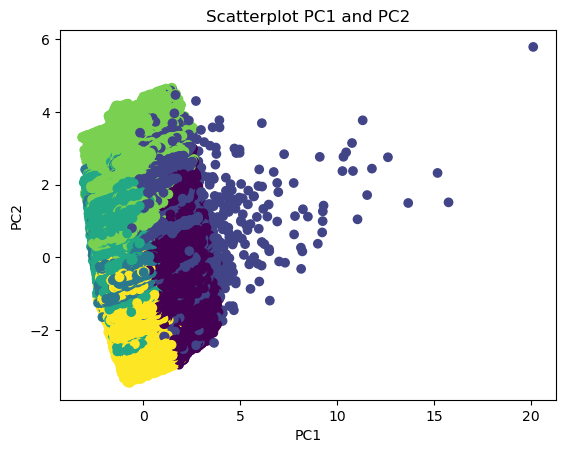

In [142]:
#Display as a scatterplot 

plt.scatter(x=pca_df['PC1'], y=pca_df['PC2'], c=pca_df['kmeans'])
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title("Scatterplot PC1 and PC2")
plt.show()

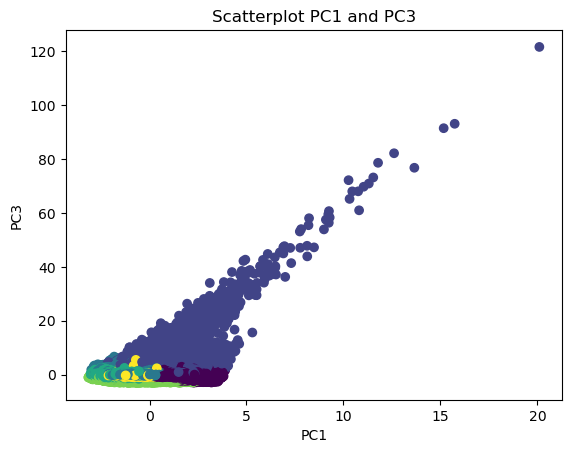

In [143]:
plt.scatter(x=pca_df['PC1'], y=pca_df['PC3'], c=pca_df['kmeans'])
plt.xlabel('PC1')
plt.ylabel('PC3')
plt.title("Scatterplot PC1 and PC3")
plt.show()

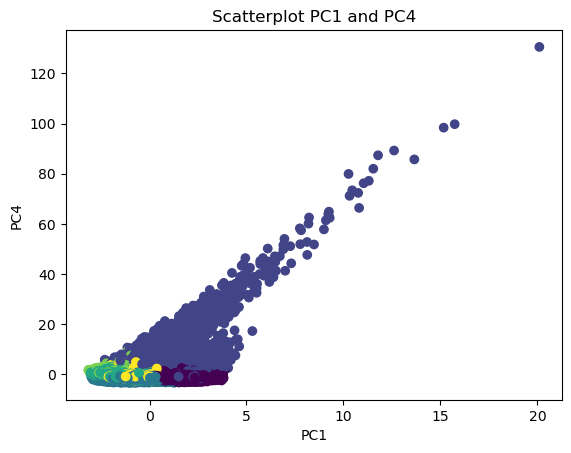

In [144]:
plt.scatter(x=pca_df['PC1'], y=pca_df['PC4'], c=pca_df['kmeans'])
plt.xlabel('PC1')
plt.ylabel('PC4')
plt.title("Scatterplot PC1 and PC4")
plt.show()

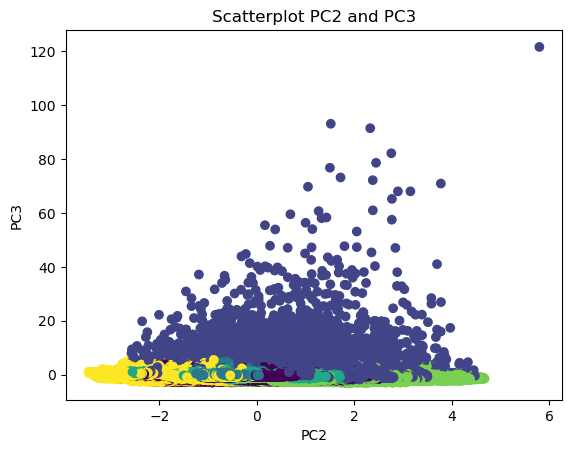

In [145]:
plt.scatter(x=pca_df['PC2'], y=pca_df['PC3'], c=pca_df['kmeans'])
plt.xlabel('PC2')
plt.ylabel('PC3')
plt.title("Scatterplot PC2 and PC3")
plt.show()

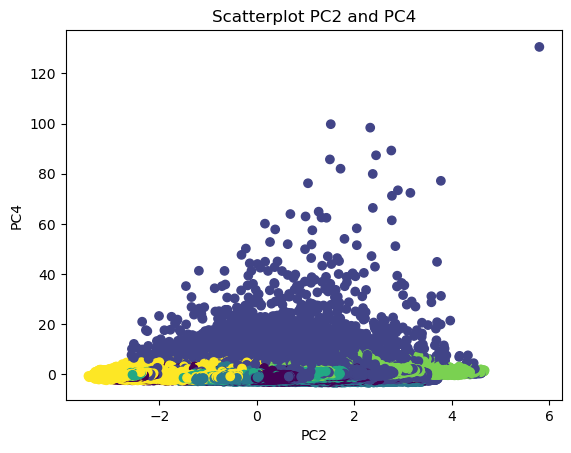

In [146]:
plt.scatter(x=pca_df['PC2'], y=pca_df['PC4'], c=pca_df['kmeans'])
plt.xlabel('PC2')
plt.ylabel('PC4')
plt.title("Scatterplot PC2 and PC4")
plt.show()

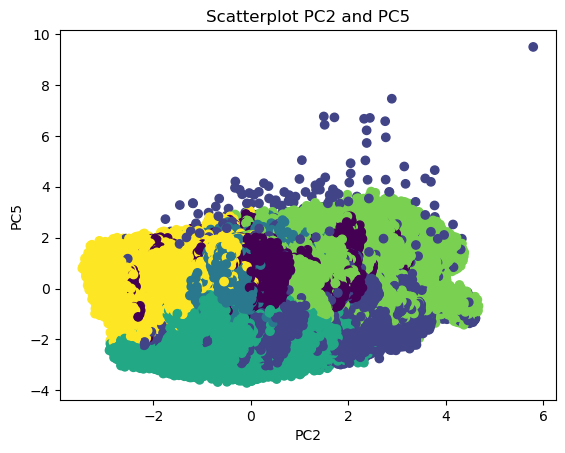

In [147]:
plt.scatter(x=pca_df['PC2'], y=pca_df['PC5'], c=pca_df['kmeans'])
plt.xlabel('PC2')
plt.ylabel('PC5')
plt.title("Scatterplot PC2 and PC5")
plt.show()

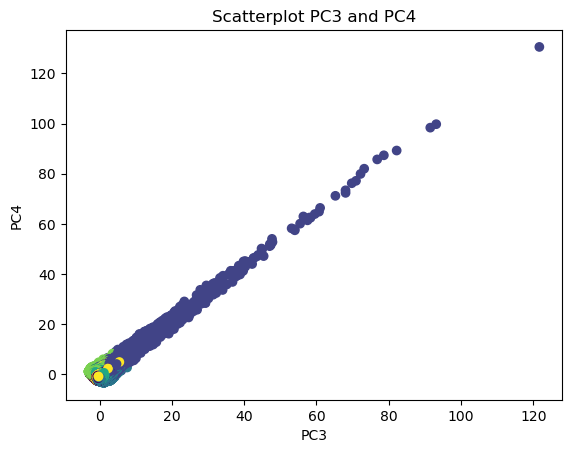

In [148]:
plt.scatter(x=pca_df['PC3'], y=pca_df['PC4'], c=pca_df['kmeans'])
plt.xlabel('PC3')
plt.ylabel('PC4')
plt.title("Scatterplot PC3 and PC4")
plt.show()

## 10. Train the Mean Shift Model

Scaling and Dimension Reduction 

In [ ]:
#X = yearspend.drop(columns=['age', 'acct_num', 'mean_amt', 'max_amt', 'min_amt'])

In [ ]:
#meanshift = MeanShift()
#meanshift.fit(X)

In [ ]:
#df['meanshift'] = meanshift.predict(X)

In [ ]:
#feat_list = ['gender','zip','city_pop','job', 'category', 'amt', 'month_year', 'distance', 'ageband', 'hour', 'weekday']
#pairs = [(a, b) for idx, a in enumerate(feat_list) for b in feat_list[idx + 1:]]

In [ ]:
#base = alt.Chart(df).mark_point().encode(color='meanshift:N')
#for a, b in pairs:
  #base.encode(x=a, y=b).display() 

In [ ]:
#df[feat_list + ['meanshift']].groupby('meanshift').mean()

In [ ]:
#df.head(20)

## 11. Perform Hierarchical Clustering

In [ ]:
#X = yearspend.drop(columns=['age', 'acct_num', 'mean_amt', 'max_amt', 'min_amt'])

In [ ]:
#model = AgglomerativeClustering(distance_threshold=0, n_clusters=None)

In [ ]:
#model.fit(X)

In [ ]:
#from scipy.cluster.hierarchy import dendrogram
#from matplotlib import pyplot as plt

#def plot_dendrogram(model, **kwargs):
    #counts = np.zeros(model.children_.shape[0])
    #n_samples = len(model.labels_)
    #for i, merge in enumerate(model.children_):
        #current_count = 0
        #for child_idx in merge:
            #if child_idx < n_samples:
                #current_count += 1  # leaf node
            #else:
                #current_count += counts[child_idx - n_samples]
        #counts[i] = current_count

    #linkage_matrix = np.column_stack(
        #[model.children_, model.distances_, counts]
    #).astype(float)

    #plt.figure(figsize=(20, 7))
    #dendrogram(linkage_matrix, **kwargs)

In [ ]:
#plot_dendrogram(model)

In [ ]:
#plot_dendrogram(model, truncate_mode="level", p=5)

In [ ]:
#ac3 = AgglomerativeClustering(n_clusters = 5)
#yearspend['aggcluster3'] = ac3.fit_predict(X)

In [ ]:
#feat_list = ['mth_year', 'category', 'ageband', 'gender', 'job', 'city_pop', 'zip', 'distance', 'hour', 'weekday', 'total_amt']

#pairs = [(a, b) for idx, a in enumerate(feat_list) for b in feat_list[idx + 1:]]

In [ ]:
#base = alt.Chart(yearspend).mark_point().encode(color='aggcluster3:N')
#for a, b in pairs:
  #base.encode(x=a, y=b).display() 

** Ende **